In [ ]:
##this script will take a dataframe and generate a KDE plot with medians
## Venice Servellita 2022-01-09

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
plt.rcParams['svg.fonttype'] = 'none'
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [145]:
data1 = pd.read_csv("data1.csv")
df_1 = pd.DataFrame(data=data1)

In [146]:
df_1.head()

sample_id  days variant
0       162    27   delta
1       183    18   delta
2        B1    23   delta
3       B11    10   delta
4       B13    13   delta

In [147]:
medians = df_1.groupby(['variant'])['days'].median()
df_med = medians.add_suffix('_Med').reset_index()
df_med

variant  days
0    delta_Med    15
1  omicron_Med    11

In [148]:
delta_med = df_med.iloc[0][1]
delta_med

15

In [149]:
om_med = df_med.iloc[1][1]
om_med

11

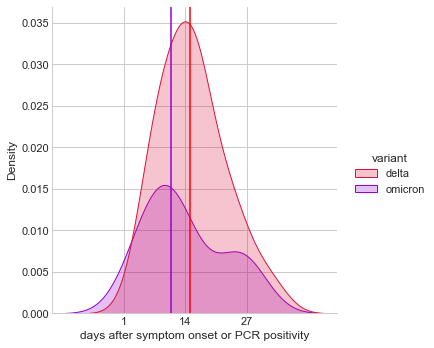

In [150]:
sns.set(rc = {'figure.figsize':(8,8)})
plt.style.use('seaborn-whitegrid')
sns.displot(df_1, x="days", hue="variant",kind="kde",fill=True, palette=["#DC143C","darkviolet"])
plt.axvline(delta_med, c='red')
plt.axvline(om_med, c='darkviolet')
plt.xticks(np.arange(1, 32, step=13))
plt.xlabel('days after symptom onset or PCR positivity')
plt.savefig('KDE_days.pdf', bbox_inches='tight',dpi=1200)